In [1]:
import pandas as pd
import numpy as np
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Si reducimos esto a una tabla para saber que tenemos ya limpito y que no. **Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I ya dejamos algunas columnas limpitas:

age | ❌ esta en formato string cuando debería ser integer y en algunos casos tenemos rangos de edad

species | ❌ es un jaleo! Debemos unificar los nombres y reducir a las especies más importantes

In [2]:
df=pd.read_csv('../EDA/datos/attack_limpieza2.csv', index_col=0)
df.sample(2)

,case_number,year,type,country,activity,age,time,species_,mes,fatal_,sex2,cleaned_species
6107,1863.07.09,1863,Provoked,usa,Fishing,27,NaN,NAN,Jul,n,M,Undefined
4707,1948.03.13.R,1948,Unprovoked,kenya,NaN,27,NaN,NAN,Mar,y,M,Undefined


Por lo tanto, en este ejercicio tendremos que limpiar los outliers.
- EJERCICIO 1: ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [3]:
df_num=df.select_dtypes(include=np.number)
df_num.sample(2)

,year,age
334,2017,51
2344,1998,26


- EJERCICIO 2: Identifica visualmente los outliers

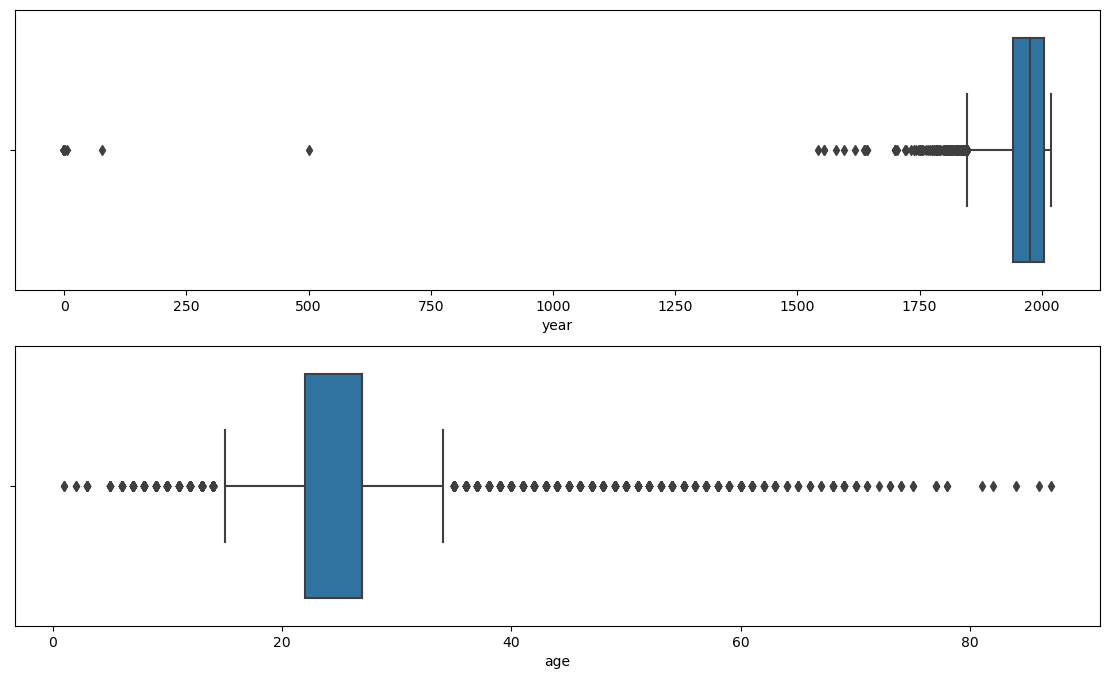

In [4]:
fig, ax = plt.subplots(2,1, figsize=(14,8))
for i in range(len(df_num.columns)):
    sns.boxplot(x=df_num.columns[i], data=df_num, ax=ax[i])
plt.show()

In [5]:
df_num.isnull().sum()

year    0
age     0
dtype: int64

- EJERCICIO 3: Identifica sobre el dataframe las filas que son outliers

In [6]:
q1_year=np.percentile(df["year"],25)
q3_year=np.percentile(df["year"],75)
iqr_year=q3_year-q1_year
outlier_step=1.5 * iqr_year
outliers_year=df[(df["year"]< q1_year - outlier_step) | (df["year"]> q3_year + outlier_step)]

In [7]:
outliers_year.sample(5)

,case_number,year,type,country,activity,age,time,species_,mes,fatal_,sex2,cleaned_species
6227,1839.00.00.a,1839,Unprovoked,fiji,NaN,29,NaN,NAN,NaN,n,M,Undefined
73,ND-0115,0,Unprovoked,new zealand,NaN,27,NaN,NAN,Jun,y,M,Undefined
83,ND.0102,0,Unprovoked,bahrein,Pearl diving,27,NaN,Tiger shark,NaN,y,M,Tiger
144,ND.0026,0,Unprovoked,belize,Standing,16,NaN,12' tiger shark,NaN,y,M,Tiger
107,ND.0068,0,Unprovoked,mozambique,Skindiving,36,NaN,"""A pack of sharks""",NaN,n,M,Undefined


In [8]:
q1_age=np.percentile(df["age"],25)
q3_age=np.percentile(df["age"],75)
iqr_age=q3_age-q1_age
outlier_age_step=1.5 * iqr_age
outliers_age=df[(df["age"]< q1_age - outlier_age_step) | (df["age"]> q3_age + outlier_age_step)]
outliers_age.sample(5)

,case_number,year,type,country,activity,age,time,species_,mes,fatal_,sex2,cleaned_species
1192,2010.05.18.c,2010,Unprovoked,vietnam,Rescuing,58,18h00,20 to 30kg shark,May,n,F,Undefined
2893,1988.06.05,1988,Unprovoked,usa,Swimming,12,12h00,NAN,Jun,n,M,Undefined
1907,2003.09.14.a,2003,Invalid,usa,Swimming,10,13h30,Shark involvement doubtful,Sep,NaN,F,Undefined
1055,2011.08.01,2011,Unprovoked,seychelles,Diving,36,15h30,NAN,Aug,y,M,Undefined
461,2016.03.31,2016,Unprovoked,usa,Snorkeling,46,11h00,NAN,Mar,n,F,Undefined


- EJERCICIO 4: Reemplaza los outliers por el estadístico más correcto.

In [9]:
def indices_year(columnas, df): #Función para sacr los indices de la columna year
    
    dicc={} 
    for col in columnas:
        Q1=np.nanpercentile(df[col], 25)
        Q3=np.nanpercentile(df[col], 75)
        IQR=Q3-Q1
        outliers_step=1.5*IQR
        outliers_data=df[(df[col] < Q1-outliers_step) | (df[col] > Q3+outliers_step)]
        #Sacamos los indices
        if outliers_data.shape[0] > 0: 
            dicc[col]=(list(outliers_data.index))
    return dicc


In [10]:
lista_columnas=["year"]
ind=indices_year(lista_columnas, df)

In [11]:
for k, v in ind.items(): #aqui iteramos por esos indices y los cambiamos por la mediana de la columna year
    mediana=df[k].median()
    for i in v:
        df.loc[i,k]=mediana

In [12]:
def indices_age(columnas, df): #Función para sacar los indices de la columna age usando sólo el Q1
    
    dicc={} 
    for col in columnas:
        Q1=np.nanpercentile(df[col], 25)
        Q3=np.nanpercentile(df[col], 75)
        IQR=Q3-Q1
        outliers_step=1.5*IQR
        outliers_data=df[(df[col] < Q1-outliers_step)]
        #Sacamos los indices
        if outliers_data.shape[0] > 0: 
            dicc[col]=(list(outliers_data.index))
    return dicc

In [13]:
columna=["age"]
ind_age=indices_age(columna, df)

In [14]:
for k, v in ind_age.items(): #aqui iteramos por esos indices y los cambiamos por la mediana de la columna age
    media=df[k].median()
    for i in v:
        df.loc[i,k]=media

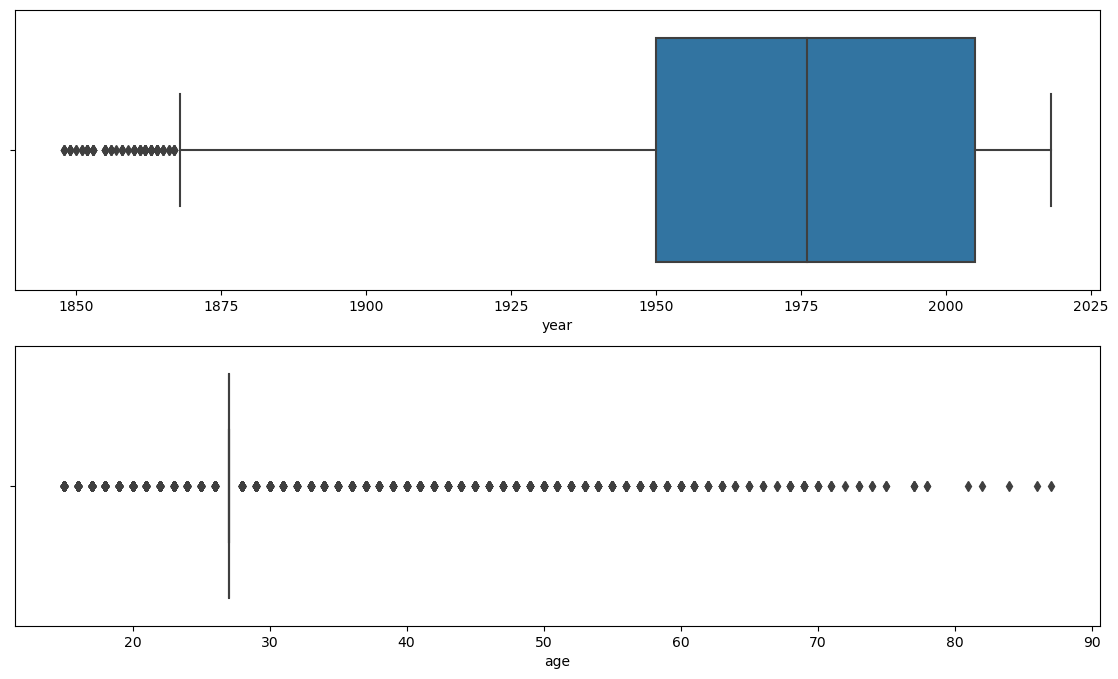

In [15]:
fig, ax = plt.subplots(2,1, figsize=(14,8))
for i in range(len(df_num.columns)):
    sns.boxplot(x=df_num.columns[i], data=df_num, ax=ax[i])
plt.show()

Verificamos y listo nuestros outlayers se han cambiado modificando también nuestras estadisticas

- EJERCICIO 5: Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [16]:
df.to_csv("../EDA/datos/attack_limpieza3.csv")